<a href="https://colab.research.google.com/github/jprodrigues644/ImageClassifier/blob/main/SEBASTIAO_RODRIGUES_tp_Image_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 TP Classissification d'Image Deep Learning-ING3


**SEBASTIAO RODRIGUES Joao Paulos**

# **Protocole expérimental:**

**Division des données:**
> Premierement nous allons diviser l'ensemble données en ensembles d'entraînement, de validation et de test. Par exemple, 70% pour l'entraînement, 20% pour la validation et 10% pour les tests.



**Évaluation du modèle:**

>Ensuite nous allons evaluer les performances du modèle sur l'ensemble de validation à chaque époque pour ajuster les hyperparamètres. Puis nous allons l'ensemble de test final pour évaluer la performance ultime du modèle.

**Mesures de performance:**

>Nous allons utiliser les métriques d'évaluation tel que la precision, le rappel(recall)  et le F1-score  pour évaluer la performance du modèle.

**Comparaison des modèles:**

>Nous allons entrainer et comparer les differents modèles en utilisant le même protocole expérimental pour pouvoir les comparer de manière équitable.

In [ ]:
#Importation des differentes librairies
import  os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

import keras
from  keras import layers, models
from keras.models import Sequential #On utilise le modele sequential pour la construction des modèles sequenciels
from keras.utils import to_categorical
from keras import optimizers


# Partie Traitement des données


In [ ]:

data_dir = ('/content/drive/MyDrive/ING_3/Deep-Learning/TP/Tp-Image/images') # à remplacer pour une execution en local
#data_dir =('images') # à remplacer pour une execution en local
os.listdir(data_dir)
#Creation d'un pipeline pour importer les données
data=tf.keras.utils.image_dataset_from_directory(data_dir) ##Pretraitement realisé avec Keras


Found 1666 files belonging to 20 classes.


In [ ]:
#Parcourrir les donnes

#Images representés comme des arrays en numpy
data= data.map(lambda x, y : (x/255, y)) # On normalise la valeur des pixels  , on pass de 0 à 255 à 0 à  1
class_names = sorted(os.listdir(data_dir))

data_iterator = data.as_numpy_iterator()
batch =data_iterator.next()
len(batch)
batch[0].shape


(32, 256, 256, 3)

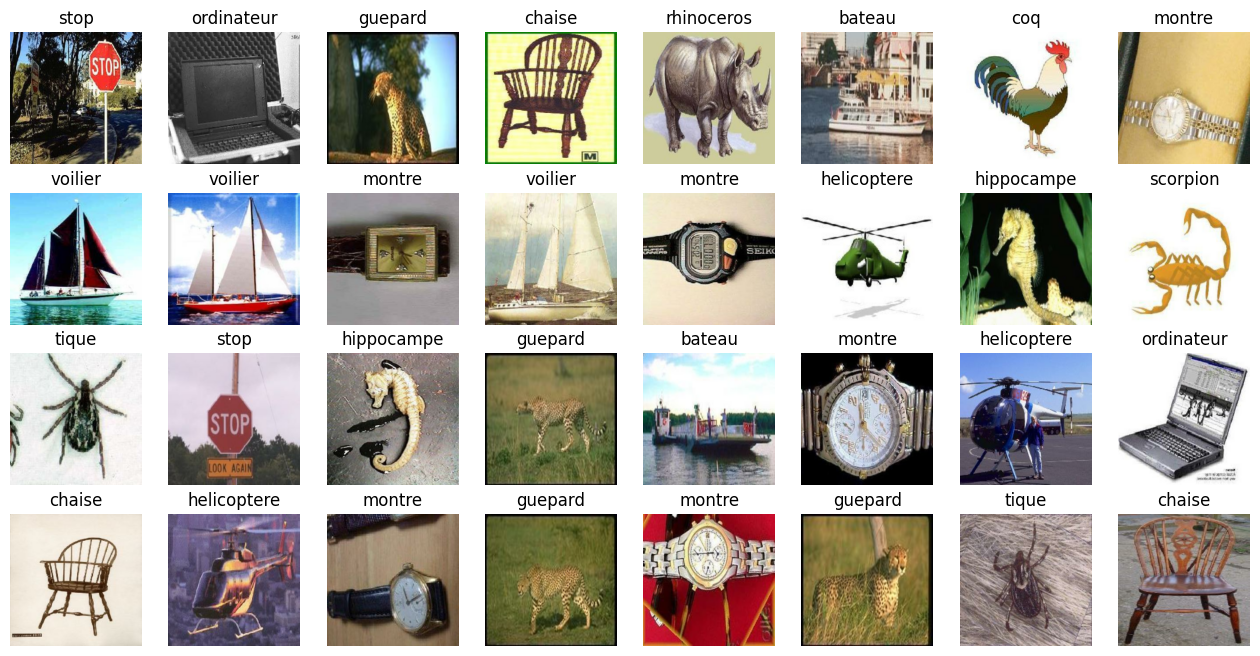

In [ ]:
# On retrouve les classes en fonction des index
fig, ax = plt.subplots(ncols=8, nrows=4, figsize=(16, 8))

for i in range(4):
    for j in range(8):
        idx = i * 8 + j
        img = batch[0][idx].astype(np.float32)
        ax[i, j].imshow(img)

        # Obtenir le nom de la classe à partir des labels y
        class_index = int(batch[1][idx])
        class_name = class_names[class_index]
        ax[i, j].set_title(class_name)

        ax[i, j].axis('off')

plt.show()


In [ ]:
#Pre Traitement
batch[0].min()
len(data)


53

In [ ]:
#Repartition de donnees  , entrainement et Validation
train_size = int(len(data)*.7)
val_size= int(len(data)*.2)
test_size = int(len(data)*.1)+1


In [ ]:
training = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip(train_size +val_size).take(test_size)

In [ ]:
len(training)

37

In [ ]:
training_data = next(iter(training))
test_data = next(iter(training))
validation_data = next(iter(validation))
y_train = np.array(training_data[1])
y_val = np.array(validation_data[1])
y_test = np.array(test_data[1])

training_encoded = to_categorical(y_train, num_classes=20)
validation_encoded = to_categorical(y_val, num_classes=20)
test_encoded = to_categorical(y_test, num_classes=20)


## **Modèle n° 1:**

In [ ]:
#On construit le modele
# On defini l'architecture du CNN
model = models.Sequential()

# Couche de convolution 2D avec activation ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu',  input_shape=(256, 256, 3)))
# Couche de pooling 2D
model.add(layers.MaxPooling2D((2, 2)))

# Ajout d'autres paires de couches convolutives et de pooling
model.add(layers.Conv2D(34, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Aplatissement des données en un vecteur
model.add(layers.Flatten())

# Ajout d'une couche dense avec activation ReLU
model.add(layers.Dense(64, activation='relu'))

# Couche de sortie avec activation softmax (pour la classification)
model.add(layers.Dense(20, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Affichage du résumé du modèle
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 125, 125, 34)      19618     
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 62, 62, 34)        0         
 ng2D)                                                           
                                                                 
 conv2d_49 (Conv2D)          (None, 60, 60, 16)        4912      
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 30, 30, 16)      

In [ ]:
#Entrainement :
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist1 = model.fit(training,epochs= 16 , validation_data = validation , callbacks= [tensorboard_callback])


Epoch 1/16
37/37 [==============================] - 8s 150ms/step - loss: 2.8848 - accuracy: 0.1698 - val_loss: 2.5990 - val_accuracy: 0.2875
Epoch 2/16
37/37 [==============================] - 7s 195ms/step - loss: 2.5451 - accuracy: 0.2703 - val_loss: 2.3865 - val_accuracy: 0.3281
Epoch 3/16
37/37 [==============================] - 7s 169ms/step - loss: 2.1099 - accuracy: 0.3953 - val_loss: 1.8828 - val_accuracy: 0.4500
Epoch 4/16
37/37 [==============================] - 9s 231ms/step - loss: 1.6505 - accuracy: 0.5363 - val_loss: 1.4329 - val_accuracy: 0.6156
Epoch 5/16
37/37 [==============================] - 6s 152ms/step - loss: 1.2909 - accuracy: 0.6326 - val_loss: 1.4326 - val_accuracy: 0.6031
Epoch 6/16
37/37 [==============================] - 8s 200ms/step - loss: 0.9457 - accuracy: 0.7230 - val_loss: 1.2454 - val_accuracy: 0.6313
Epoch 7/16
37/37 [==============================] - 6s 151ms/step - loss: 0.5622 - accuracy: 0.8378 - val_loss: 1.0097 - val_accuracy: 0.7406
Epoch 

# Évaluation du modèle  1 :

In [ ]:
from sklearn.metrics import precision_score,recall_score , f1_score

y_true_list = []
y_pred_list = []

for batch in test.as_numpy_iterator():
    X, y_true_batch = batch
    y_pred_batch = model.predict(X)

    y_true_list.extend(y_true_batch)
    y_pred_list.extend(y_pred_batch.argmax(axis=1))

y_true = np.array(y_true_list)
y_pred = np.array(y_pred_list)

# Calcul de la précision
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")



1/1 [==============================] - 0s 119ms/step
Recall: 0.808641975308642
Precision: 0.8270035006146118
F1 Score: 0.8086219166237163


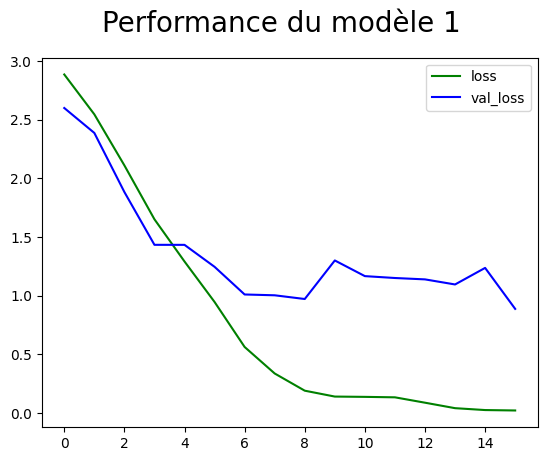

In [ ]:
#Affichage de la performnce
fig = plt.figure()
plt.plot(hist1.history['loss'], color = 'green',label = 'loss')
plt.plot(hist1.history['val_loss'], color = 'blue',label = 'val_loss')
plt.legend(loc="upper right")
fig.suptitle('Performance du modèle 1', fontsize=20)
plt.show()

Amélioration des hyperametres , on réduit le taux d'apprentisage:

In [ ]:

# Définir l'architecture du CNN
model = models.Sequential()

# Couche de convolution 2D avec activation ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
# Couche de pooling 2D
model.add(layers.MaxPooling2D((2, 2)))

# Ajout d'autres paires de couches convolutives et de pooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplatisemment les données en un vecteur
model.add(layers.Flatten())

# Ajout une couche dense avec activation ReLU
model.add(layers.Dense(256, activation='relu'))
# Ajout une couche de dropout pour régulariser
model.add(layers.Dropout(0.5))

# Couche de sortie avec activation softmax (pour la classification)
model.add(layers.Dense(20, activation='softmax'))
#Utilation de l'optimisateur Adam
optimizer = optimizers.Adam(learning_rate=0.0005)

# Compiler le modèle
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_51 (Conv2D)          (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 62, 62, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_52 (Conv2D)          (None, 60, 60, 256)       295168    
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 30, 30, 256)     

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist1 = model.fit(training,epochs= 16 , validation_data = validation , callbacks= [tensorboard_callback])

Epoch 1/16
37/37 [==============================] - 14s 245ms/step - loss: 2.9589 - accuracy: 0.1867 - val_loss: 2.4024 - val_accuracy: 0.2969
Epoch 2/16
37/37 [==============================] - 9s 236ms/step - loss: 2.3075 - accuracy: 0.3454 - val_loss: 1.8826 - val_accuracy: 0.5250
Epoch 3/16
37/37 [==============================] - 8s 211ms/step - loss: 1.8238 - accuracy: 0.4823 - val_loss: 1.6096 - val_accuracy: 0.5906
Epoch 4/16
37/37 [==============================] - 9s 224ms/step - loss: 1.3516 - accuracy: 0.6149 - val_loss: 1.1725 - val_accuracy: 0.7094
Epoch 5/16
37/37 [==============================] - 11s 279ms/step - loss: 0.9723 - accuracy: 0.7035 - val_loss: 0.8928 - val_accuracy: 0.7594
Epoch 6/16
37/37 [==============================] - 8s 213ms/step - loss: 0.6044 - accuracy: 0.8285 - val_loss: 0.8376 - val_accuracy: 0.7625
Epoch 7/16
37/37 [==============================] - 9s 229ms/step - loss: 0.4582 - accuracy: 0.8742 - val_loss: 0.9044 - val_accuracy: 0.7812
Epoc

In [ ]:
from sklearn.metrics import precision_score,recall_score , f1_score

y_true_list = []
y_pred_list = []

for batch in test.as_numpy_iterator():
    X, y_true_batch = batch
    y_pred_batch = model.predict(X)

    y_true_list.extend(y_true_batch)
    y_pred_list.extend(y_pred_batch.argmax(axis=1))

y_true = np.array(y_true_list)
y_pred = np.array(y_pred_list)

# Calcule des métriques
precision1= precision_score(y_true, y_pred, average='weighted')
recall1 = recall_score(y_true, y_pred, average='weighted')
f11 = f1_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall1}")
print(f"Precision: {precision1}")
print(f"F1 Score: {f11}")

1/1 [==============================] - 0s 75ms/step
Recall: 0.8580246913580247
Precision: 0.8660787771898883
F1 Score: 0.8543337015024364


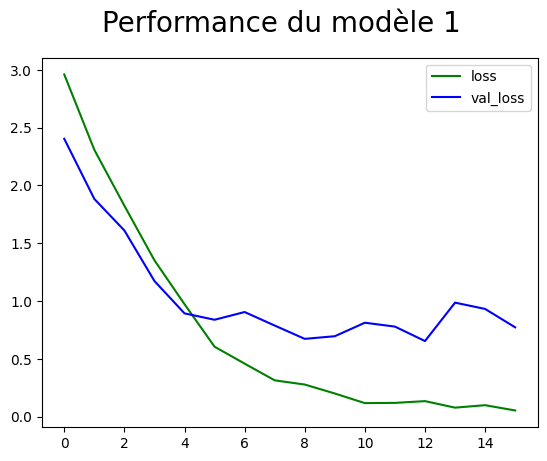

In [ ]:
#Affichage de la performnce
fig = plt.figure()
plt.plot(hist1.history['loss'], color = 'green',label = 'loss')
plt.plot(hist1.history['val_loss'], color = 'blue',label = 'val_loss')
plt.legend(loc="upper right")
fig.suptitle('Performance du modèle 1', fontsize=20)
plt.show()

On observe que l'on obtient  une meilleure performance ni une meilleure exatitude en baissant le taux d'apprentisage.


## Modèle n° 2  :

In [ ]:
model2= models.Sequential()
model2.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(256, 256, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(16, (5, 5), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(120, activation='relu'))
model2.add(layers.Dense(84, activation='relu'))
model2.add(layers.Dense(20, activation='softmax'))

#Utilation de l'optimisateur Adam
optimizer2 = optimizers.Adam(learning_rate=0.001)
# Compiler le modèle
model2.compile(optimizer=optimizer2,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Affichage du résumé du modèle

model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 252, 252, 6)       456       
                                                                 
 max_pooling2d_49 (MaxPooli  (None, 126, 126, 6)       0         
 ng2D)                                                           
                                                                 
 conv2d_58 (Conv2D)          (None, 122, 122, 16)      2416      
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 61, 61, 16)        0         
 ng2D)                                                           
                                                                 
 flatten_19 (Flatten)        (None, 59536)             0         
                                                                 
 dense_42 (Dense)            (None, 120)             

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist2 = model2.fit(training,epochs= 16 , validation_data = validation , callbacks= [tensorboard_callback])

Epoch 1/16
37/37 [==============================] - 8s 146ms/step - loss: 2.9695 - accuracy: 0.1799 - val_loss: 2.6051 - val_accuracy: 0.2812
Epoch 2/16
37/37 [==============================] - 6s 144ms/step - loss: 2.3587 - accuracy: 0.3083 - val_loss: 2.0685 - val_accuracy: 0.3875
Epoch 3/16
37/37 [==============================] - 10s 263ms/step - loss: 1.8536 - accuracy: 0.4704 - val_loss: 1.9383 - val_accuracy: 0.4563
Epoch 4/16
37/37 [==============================] - 8s 192ms/step - loss: 1.3901 - accuracy: 0.5938 - val_loss: 1.3432 - val_accuracy: 0.6187
Epoch 5/16
37/37 [==============================] - 5s 141ms/step - loss: 0.8223 - accuracy: 0.7720 - val_loss: 1.1472 - val_accuracy: 0.6812
Epoch 6/16
37/37 [==============================] - 8s 206ms/step - loss: 0.5078 - accuracy: 0.8657 - val_loss: 1.0371 - val_accuracy: 0.7469
Epoch 7/16
37/37 [==============================] - 5s 139ms/step - loss: 0.2762 - accuracy: 0.9375 - val_loss: 0.9119 - val_accuracy: 0.7531
Epoch

# Evaluation du modèle 2 :

In [ ]:
from sklearn.metrics import precision_score,recall_score , f1_score

y_true_list = []
y_pred_list = []

for batch in test.as_numpy_iterator():
    X, y_true_batch = batch
    y_pred_batch = model2.predict(X)

    y_true_list.extend(y_true_batch)
    y_pred_list.extend(y_pred_batch.argmax(axis=1))

y_true = np.array(y_true_list)
y_pred = np.array(y_pred_list)

# Calcul de la précision
precision2 = precision_score(y_true, y_pred, average='weighted')
recall2 = recall_score(y_true, y_pred, average='weighted')
f12 = f1_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall2}")
print(f"Precision: {precision2}")
print(f"F1 Score: {f12}")

1/1 [==============================] - 0s 70ms/step
Recall: 0.7530864197530864
Precision: 0.809055193777416
F1 Score: 0.7631166672833339


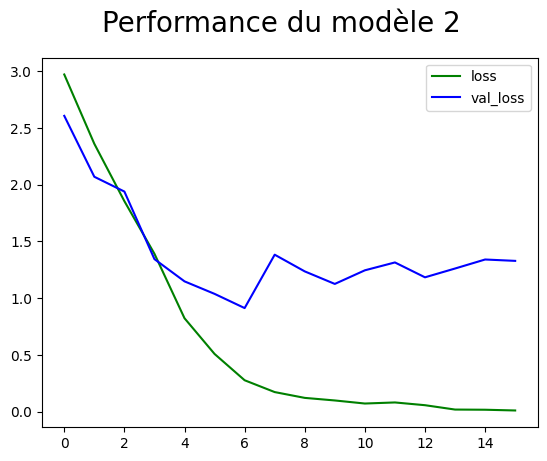

In [ ]:
#Affichage de la performnce
fig = plt.figure()
plt.plot(hist2.history['loss'], color = 'green',label = 'loss')
plt.plot(hist2.history['val_loss'], color = 'blue',label = 'val_loss')
plt.legend(loc="upper right")
fig.suptitle('Performance du modèle 2', fontsize=20)
plt.show()

# Learning Rate à 0.0005

In [ ]:
optimizer2 = optimizers.Adam(learning_rate=0.0005)
model2.compile(optimizer=optimizer2,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist2 = model2.fit(training,epochs= 16 , validation_data = validation , callbacks= [tensorboard_callback])

Epoch 1/16
37/37 [==============================] - 9s 188ms/step - loss: 2.9392 - accuracy: 0.1444 - val_loss: 2.6971 - val_accuracy: 0.1781
Epoch 2/16
37/37 [==============================] - 8s 211ms/step - loss: 2.3415 - accuracy: 0.3370 - val_loss: 1.9989 - val_accuracy: 0.4437
Epoch 3/16
37/37 [==============================] - 7s 185ms/step - loss: 1.6251 - accuracy: 0.5448 - val_loss: 1.6099 - val_accuracy: 0.5656
Epoch 4/16
37/37 [==============================] - 5s 140ms/step - loss: 1.0830 - accuracy: 0.7162 - val_loss: 1.3461 - val_accuracy: 0.6187
Epoch 5/16
37/37 [==============================] - 7s 195ms/step - loss: 0.6933 - accuracy: 0.8218 - val_loss: 1.2508 - val_accuracy: 0.6469
Epoch 6/16
37/37 [==============================] - 6s 142ms/step - loss: 0.4768 - accuracy: 0.8894 - val_loss: 0.9949 - val_accuracy: 0.7469
Epoch 7/16
37/37 [==============================] - 8s 205ms/step - loss: 0.2487 - accuracy: 0.9561 - val_loss: 0.8902 - val_accuracy: 0.7906
Epoch 

# Evaluation avec un Learning rate de 0.005 modèle 2 :

In [ ]:
from sklearn.metrics import precision_score,recall_score , f1_score

y_true_list = []
y_pred_list = []

for batch in test.as_numpy_iterator():
    X, y_true_batch = batch
    y_pred_batch = model2.predict(X)

    y_true_list.extend(y_true_batch)
    y_pred_list.extend(y_pred_batch.argmax(axis=1))

y_true = np.array(y_true_list)
y_pred = np.array(y_pred_list)

# Calcule des métriques
precision2 = precision_score(y_true, y_pred, average='weighted')
recall2 = recall_score(y_true, y_pred, average='weighted')
f12 = f1_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall2}")
print(f"Precision: {precision2}")
print(f"F1 Score: {f12}")

1/1 [==============================] - 0s 106ms/step
Recall: 0.7098765432098766
Precision: 0.7904782442306809
F1 Score: 0.7264994670166097


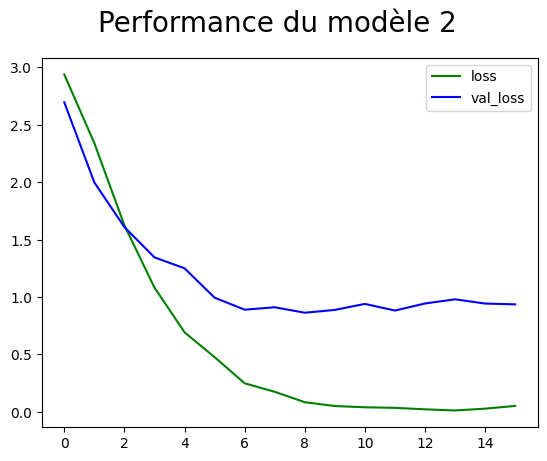

In [ ]:
#Affichage de la performnce
fig = plt.figure()
plt.plot(hist2.history['loss'], color = 'green',label = 'loss')
plt.plot(hist2.history['val_loss'], color = 'blue',label = 'val_loss')
plt.legend(loc="upper right")
fig.suptitle('Performance du modèle 2 ', fontsize=20)
plt.show()

 On obtient de meilleurs résultats avec un learning rate de 0.001

 Ce modèle reste moins performant et moins précis que le modèle n° 1

# **Modèle n° 3**



In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model3 = Sequential()
model3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model3.add(Conv2D(16, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(20, activation='softmax'))
# Compiler le modèle
optimizer3 = optimizers.Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer3,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Affichage du résumé du modèle
model3.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 conv2d_80 (Conv2D)          (None, 252, 252, 16)      2320      
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 126, 126, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_81 (Conv2D)          (None, 124, 124, 32)      4640      
                                                                 
 conv2d_82 (Conv2D)          (None, 122, 122, 32)      9248      
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 61, 61, 32)        0         
 ng2D)                                               

In [ ]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist3 = model3.fit(training,epochs= 16 , validation_data = validation , callbacks= [tensorboard_callback])

Epoch 1/16
37/37 [==============================] - 52s 150ms/step - loss: 2.9548 - accuracy: 0.1394 - val_loss: 2.7434 - val_accuracy: 0.1500
Epoch 2/16
37/37 [==============================] - 8s 195ms/step - loss: 2.4499 - accuracy: 0.3066 - val_loss: 1.9708 - val_accuracy: 0.4406
Epoch 3/16
37/37 [==============================] - 6s 148ms/step - loss: 1.8137 - accuracy: 0.4780 - val_loss: 1.4820 - val_accuracy: 0.5719
Epoch 4/16
37/37 [==============================] - 8s 219ms/step - loss: 1.1379 - accuracy: 0.6605 - val_loss: 1.1366 - val_accuracy: 0.6844
Epoch 5/16
37/37 [==============================] - 6s 148ms/step - loss: 0.6767 - accuracy: 0.8015 - val_loss: 0.9671 - val_accuracy: 0.7719
Epoch 6/16
37/37 [==============================] - 8s 198ms/step - loss: 0.4277 - accuracy: 0.8885 - val_loss: 0.9099 - val_accuracy: 0.7625
Epoch 7/16
37/37 [==============================] - 6s 147ms/step - loss: 0.2481 - accuracy: 0.9400 - val_loss: 0.8833 - val_accuracy: 0.7969
Epoch

# Evaluation Modèle 3 n° :

In [ ]:
from sklearn.metrics import precision_score,recall_score , f1_score

y_true_list = []
y_pred_list = []

for batch in test.as_numpy_iterator():
    X, y_true_batch = batch
    y_pred_batch = model3.predict(X)

    y_true_list.extend(y_true_batch)
    y_pred_list.extend(y_pred_batch.argmax(axis=1))

y_true = np.array(y_true_list)
y_pred = np.array(y_pred_list)

# Calcul des métriques
precision3 = precision_score(y_true, y_pred, average='weighted')
recall3 = recall_score(y_true, y_pred, average='weighted')
f13 = f1_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall3}")
print(f"Precision: {precision3}")
print(f"F1 Score: {f13}")

1/1 [==============================] - 0s 19ms/step
Recall: 0.808641975308642
Precision: 0.8316476047957531
F1 Score: 0.8032524974257725


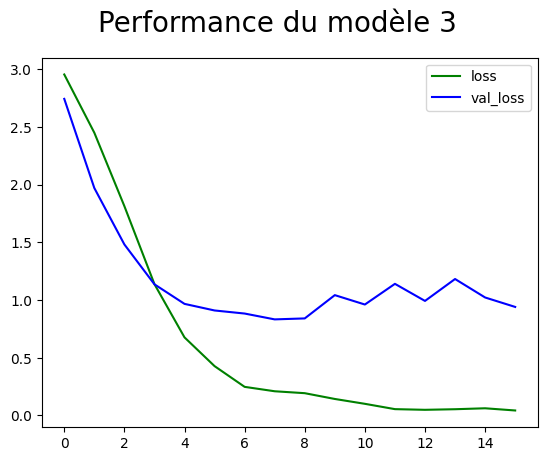

In [ ]:
#Affichage de la performnce
fig = plt.figure()
plt.plot(hist3.history['loss'], color = 'green',label = 'loss')
plt.plot(hist3.history['val_loss'], color = 'blue',label = 'val_loss')
plt.legend(loc="upper right")
fig.suptitle('Performance du modèle 3 ', fontsize=20)
plt.show()

### Lerning Rate à 0.0005

In [ ]:
optimizer3 = optimizers.Adam(learning_rate=0.0005)  #On peut tester plusieurs taux d'apprentissage
model3.compile(optimizer=optimizer3,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist3 = model3.fit(training,epochs= 16 , validation_data = validation , callbacks= [tensorboard_callback])

Epoch 1/16
37/37 [==============================] - 9s 163ms/step - loss: 2.8853 - accuracy: 0.1934 - val_loss: 2.3492 - val_accuracy: 0.3531
Epoch 2/16
37/37 [==============================] - 8s 220ms/step - loss: 2.1699 - accuracy: 0.3809 - val_loss: 1.8268 - val_accuracy: 0.4406
Epoch 3/16
37/37 [==============================] - 6s 153ms/step - loss: 1.7141 - accuracy: 0.4975 - val_loss: 1.5665 - val_accuracy: 0.5688
Epoch 4/16
37/37 [==============================] - 8s 203ms/step - loss: 1.2657 - accuracy: 0.6495 - val_loss: 1.1230 - val_accuracy: 0.6687
Epoch 5/16
37/37 [==============================] - 8s 221ms/step - loss: 0.8537 - accuracy: 0.7534 - val_loss: 1.0646 - val_accuracy: 0.7094
Epoch 6/16
37/37 [==============================] - 8s 200ms/step - loss: 0.5874 - accuracy: 0.8294 - val_loss: 0.9793 - val_accuracy: 0.7188
Epoch 7/16
37/37 [==============================] - 6s 153ms/step - loss: 0.3820 - accuracy: 0.8927 - val_loss: 0.8780 - val_accuracy: 0.7750
Epoch 

###Evaluation modèle 3 learning Rate à 0.0005


In [ ]:
y_true_list = []
y_pred_list = []

for batch in test.as_numpy_iterator():
    X, y_true_batch = batch
    y_pred_batch = model3.predict(X)

    y_true_list.extend(y_true_batch)
    y_pred_list.extend(y_pred_batch.argmax(axis=1))

y_true = np.array(y_true_list)
y_pred = np.array(y_pred_list)

# Calcul des métriques
precision3 = precision_score(y_true, y_pred, average='weighted')
recall3 = recall_score(y_true, y_pred, average='weighted')
f13 = f1_score(y_true, y_pred, average='weighted')
print(f"Recall: {recall3}")
print(f"Precision: {precision3}")
print(f"F1 Score: {f13}")

1/1 [==============================] - 0s 104ms/step
Recall: 0.8209876543209876
Precision: 0.8484494844793741
F1 Score: 0.8121924347589247


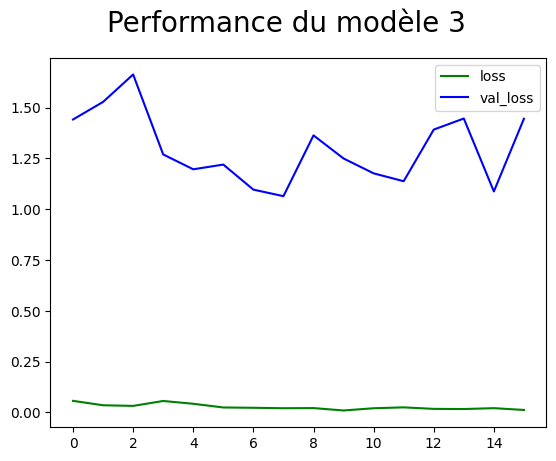

In [ ]:
#Affichage de la performnce
fig = plt.figure()
plt.plot(hist3.history['loss'], color = 'green',label = 'loss')
plt.plot(hist3.history['val_loss'], color = 'blue',label = 'val_loss')
plt.legend(loc="upper right")
fig.suptitle('Performance du modèle 3 ', fontsize=20)
plt.show()

 On obtient de meilleurs résultats avec un learning rate de 0.001

 Ce modèle reste moins performant et moins précis que le modèle 1 mais plus perfomart que le modèle 2  